In [1]:
%matplotlib inline
import matplotlib.pylab as plt 
# routlines for analyzing odes
import sys
import pickle as pk
import numpy as np
import math
import analyzeGotran as ao
import subprocess as sb
from subprocess import PIPE
import shlex
import time
import ScriptRunner as SR
import matplotlib.pyplot as plt; plt.rcdefaults()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd

from spectrum import *

%matplotlib inline

In [2]:
time = 300
counter = 0
Kp = [5,10,15,20,25,30,35] #scipy.linspace(5,20,10)
p2x7 = scipy.linspace(0.01,1,10)
for i in np.arange(len(Kp)): # ATP
    data   = SR.gotranMicroglia(sim_time      = time,
                                    ATP           = 200,
                                    output_name   = 'test1',
                                    ode_file_name = 'p2xp2yMigration33', # 6 works
                                    kg_p2y        = Kp[i],
                                    data_name2    = 'TNFae',
                                    data_name3    = 'mRNA_TNF',
                                    data_name4    = 'Distance',
                                    data_name5    = 'GaGTP',
                                    data_name6    = 'DAG',
                                    DegSwitch     = 0,
                                    removePickle  = 1)
    
    if counter == 0:
            dura    = data[0]
            Ca      = data[1]
            tnfe    = data[2]
            mrna    = data[3]
            dist    = data[4]
            gprot   = data[5]
            ip3     = data[6]
            entry   = counter
            kp      = Kp[i]
    else:
            Ca      = np.vstack([Ca,data[1]])
            tnfe    = np.vstack([tnfe,data[2]])
            mrna    = np.vstack([mrna,data[3]])
            dist    = np.vstack([dist,data[4]])
            gprot   = np.vstack([gprot,data[5]])
            ip3     = np.vstack([ip3,data[6]])
            kp      = np.append(kp,Kp[i])
        
    counter = counter + 1 
        
import pandas as pd 

data = {
    'Kp': kp,
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 3.267150640487671 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.672929525375366 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.6716315746307373 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.1584153175354 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.177939176559448 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.273353576660156 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.360125780105591 seconds --------------
 ------------ End of Simulation -----------


,Kp
0,5
1,10
2,15
3,20
4,25
5,30
6,35


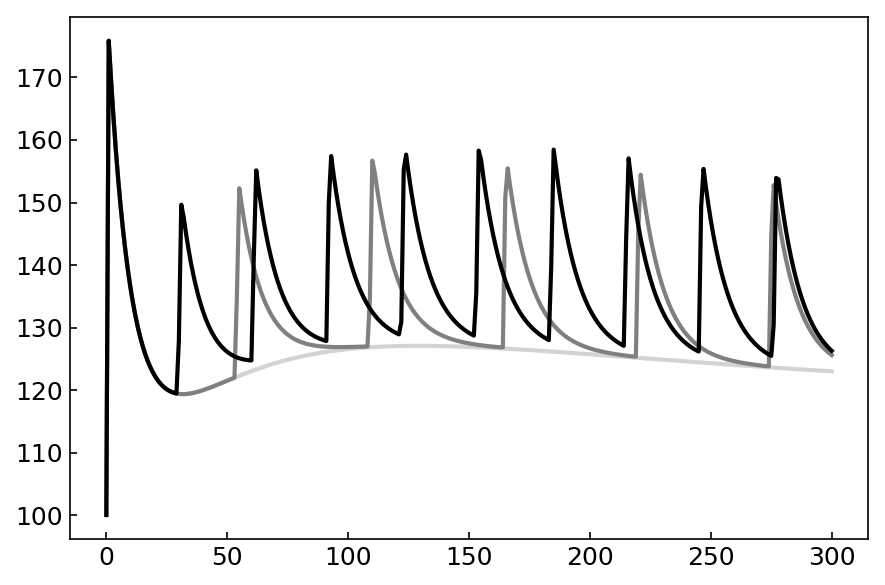

In [4]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura,Ca[0],'lightgray',alpha=1,lw=2)
#plt.plot(dura,Ca[1])
#plt.plot(dura,Ca[2])
plt.plot(dura,Ca[1],'gray',alpha=1,lw=2)
#plt.plot(dura,Ca[4])
#plt.plot(dura,Ca[5])
plt.plot(dura,Ca[2],'black',alpha=1,lw=2)
plt.tight_layout()


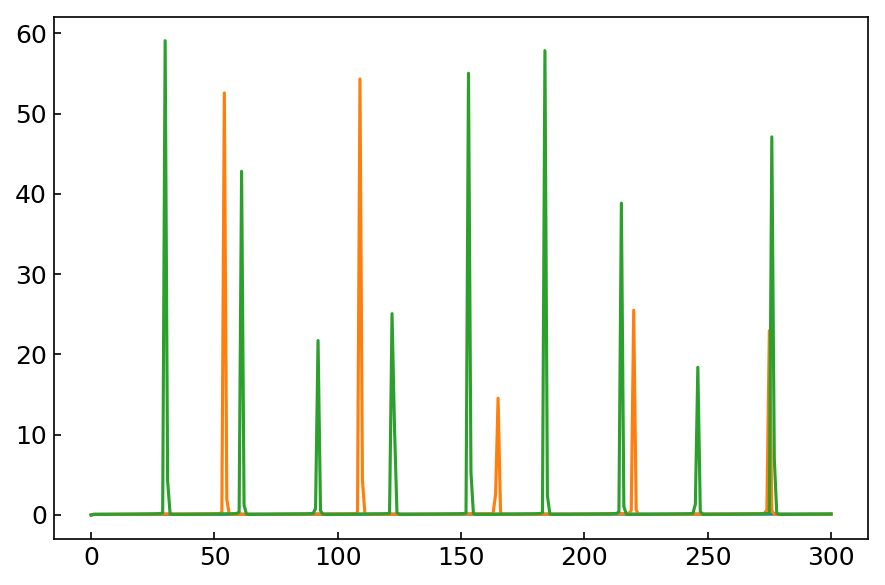

In [9]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura,ip3[0])
#plt.plot(dura,Ca[1])
#plt.plot(dura,Ca[2])
plt.plot(dura,ip3[1])
#plt.plot(dura,Ca[4])
#plt.plot(dura,Ca[5])
plt.plot(dura,ip3[2])
#plt.plot(dura,Ca[7])
plt.tight_layout()


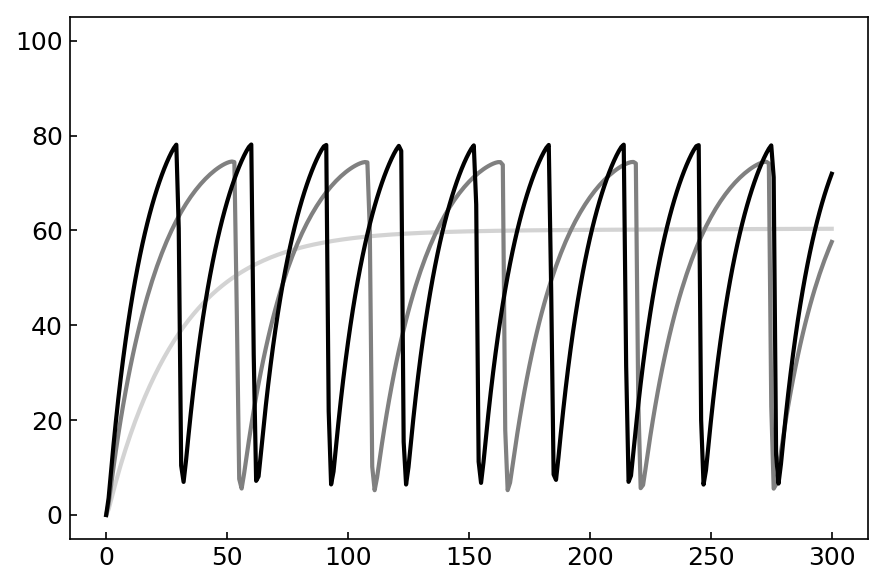

In [15]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura,gprot[0],'lightgray',alpha=1,lw=2)
#plt.plot(dura,Ca[1])
#plt.plot(dura,Ca[2])
plt.plot(dura,gprot[1],'gray',alpha=1,lw=2)
#plt.plot(dura,Ca[4])
#plt.plot(dura,Ca[5])
plt.plot(dura,gprot[2],'black',alpha=1,lw=2)
#plt.plot(dura,Ca[7])
plt.ylim([-5,105])
plt.tight_layout()


[-0.5]
[-0.016]
[-0.096]
[0.044]
[-0.164]
[-0.064]
[0.144]


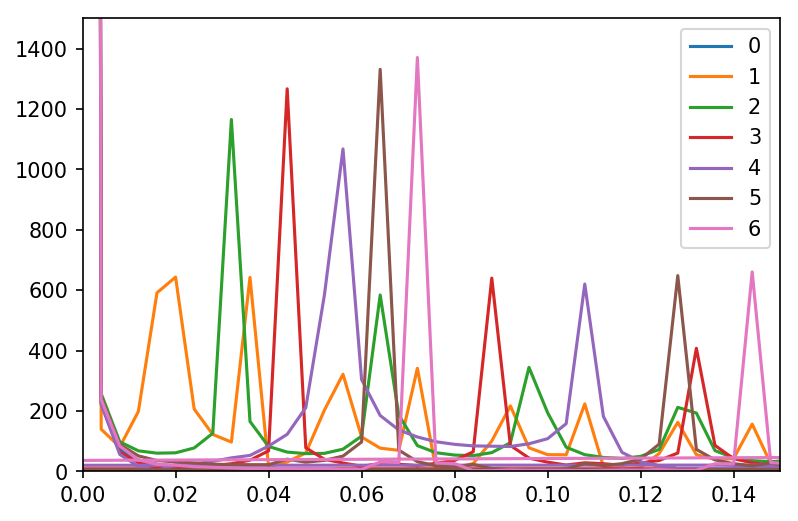

In [20]:
import numpy.fft as fft 
plt.figure(dpi=150)
for i in np.arange(7):
    s = fft.fft(Ca[i][50:300])
    f = fft.fftfreq(len(s))
    plt.plot(f, abs(s),label=str(i))
    print(f[np.where(s == max(s[10:300]))])
plt.xlim([0,0.15])
plt.ylim([0,1500])
plt.legend(loc=0)


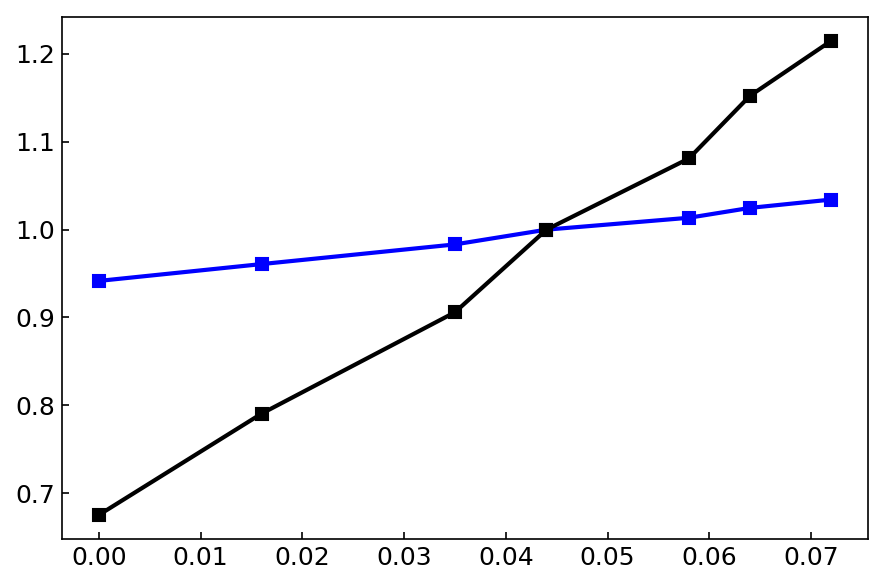

In [21]:
distdummy = np.zeros(7)
tnfdummy = np.zeros(7)
for i in np.arange(7):
    distdummy[i] = dist[i][300]
    tnfdummy[i] = tnfe[i][300]
dist_data = distdummy / distdummy[3]    
tnf_data = (tnfdummy - tnfe[0][0]) / (tnfdummy[3]-tnfe[0][0])

frequency = [0.0,0.016,0.035,0.044,0.058,0.064,0.072]

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(frequency,dist_data,'bs-',lw=2,alpha=1,label="Migration")
plt.plot(frequency,tnf_data,'ks-',lw=2,alpha=1,label="TNFa")
#plt.legend(loc=0,fontsize=9)
#plt.xlabel("Freq. (Hz)",fontsize=12)
#plt.ylabel("Relative degree of response",fontsize=12)
plt.tight_layout()
#plt.savefig("Cafreq.png")


In [16]:
time = 300
counter = 0
#Kp = [10,15,20,25,30,35,40,45] #scipy.linspace(5,20,10)
p2x7 = [0.01,0.1,0.5,1,1.5,2,2.5,5]
for i in np.arange(len(p2x7)): # ATP
    data   = SR.gotranMicroglia(sim_time      = time,
                                    ATP           = 200,
                                    output_name   = 'test1',
                                    ode_file_name = 'p2xp2yMigration33', # 6 works
                                    rhop2x7       = p2x7[i],
                                    data_name2    = 'TNFae',
                                    data_name3    = 'mRNA_TNF',
                                    data_name4    = 'Distance',
                                    DegSwitch     = 0,
                                    removePickle  = 1)
    
    if counter == 0:
            dura    = data[0]
            Ca      = data[1]
            tnfe    = data[2]
            mrna    = data[3]
            dist    = data[4]
            entry   = counter
            p2x7z      = p2x7[i]
    else:
            Ca      = np.vstack([Ca,data[1]])
            tnfe    = np.vstack([tnfe,data[2]])
            mrna    = np.vstack([mrna,data[3]])
            dist    = np.vstack([dist,data[4]])
            p2x7z      = np.append(p2x7z,p2x7[i])
        
    counter = counter + 1 
        
import pandas as pd 

data = {
    'p2x7': p2x7,
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 3.828094244003296 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.14548134803772 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.095533847808838 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.079141855239868 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.788123369216919 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.065334320068359 seconds --------------
 ------------ End of Simulation -----------


KeyboardInterrupt: 

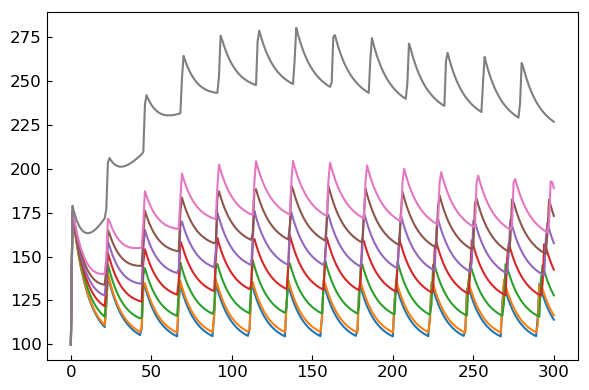

In [7]:
plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=12)
plt.plot(dura,Ca[0])
plt.plot(dura,Ca[1])
plt.plot(dura,Ca[2])
plt.plot(dura,Ca[3])
plt.plot(dura,Ca[4])
plt.plot(dura,Ca[5])
plt.plot(dura,Ca[6])
plt.plot(dura,Ca[7])
plt.tight_layout()

Ca_elev = np.zeros(7)
for i in np.arange(7):
    Ca_elev[i] = np.average(Ca[i][0:300])

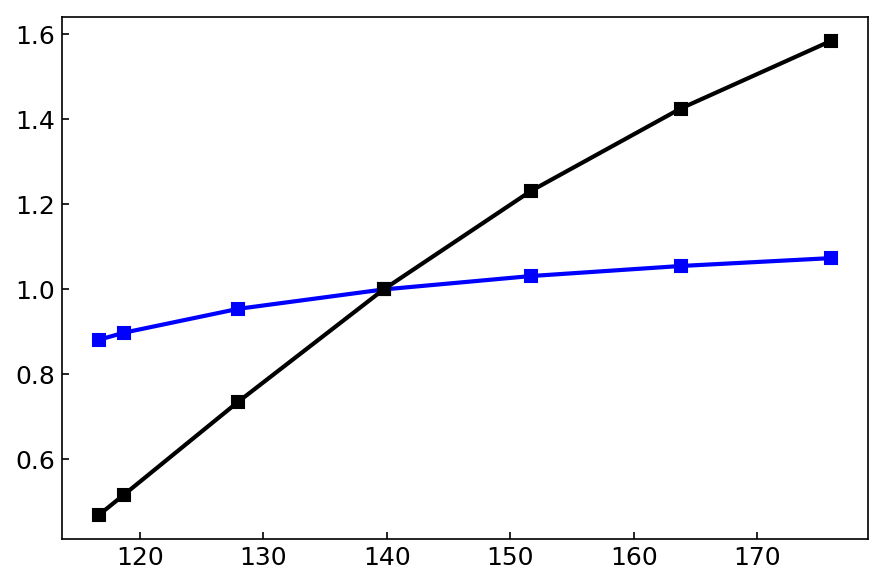

In [10]:
distdummy = np.zeros(7)
tnfdummy = np.zeros(7)
for i in np.arange(7):
    distdummy[i] = dist[i][300]
    tnfdummy[i] = tnfe[i][300]
dist_data = distdummy / distdummy[3]    
tnf_data = (tnfdummy - tnfe[0][0]) / (tnfdummy[3]-tnfe[0][0])

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(Ca_elev,dist_data,'bs-',lw=2,alpha=1,label="Migration")
plt.plot(Ca_elev,tnf_data,'ks-',lw=2,alpha=1,label="TNFa")
#plt.legend(loc=0,fontsize=9)
#plt.xlabel("$[Ca^{2+}]_i$. (nM)",fontsize=12)
#plt.ylabel("Relative degree of response",fontsize=12)
plt.tight_layout()
#plt.savefig("Caelev.png")

In [41]:
time = 600
counter = 0
Kp = scipy.linspace(1,4,10)
p2x7 = scipy.linspace(0.01,50,10)
for j in np.arange(len(p2x7)):
    data   = SR.gotranMicroglia(sim_time      = time,
                                    ATP           = 200,
                                    output_name   = 'test1',
                                    ode_file_name = 'p2xp2yMigration27', # 6 works
                                    rhop2x7       = p2x7[j],
                                    DegSwitch     = 1,
                                    EleSwitch     = 1,
                                    rhop2yc       = 0,
                                    data_name2    = 'TNFae',
                                    data_name3    = 'mRNA_TNF',
                                    data_name4    = 'S2',
                                    data_name5    = 'NFATNn',
                                    removePickle  = 1)
    
    if counter == 0:
            dura    = data[0]
            Ca      = data[1]
            tnfe    = data[2]
            mrna    = data[3]
            dist    = data[4]
            nfat    = data[5]
            entry   = counter
            p7      = p2x7[j]
    else:
            Ca      = np.vstack([Ca,data[1]])
            tnfe    = np.vstack([tnfe,data[2]])
            mrna    = np.vstack([mrna,data[3]])
            dist    = np.vstack([dist,data[4]])
            nfat    = np.vstack([nfat,data[5]])
            p7      = np.append(p7,p2x7[j])
        
    counter = counter + 1 
        
import pandas as pd 



 -------------- 7.497437000274658 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.5645411014556885 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.363513946533203 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.429150342941284 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.343853712081909 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.4665751457214355 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.662958145141602 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.406424045562744 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.545652866363525 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.51630163192749 seconds --------------
 ------------ End of Simulation -

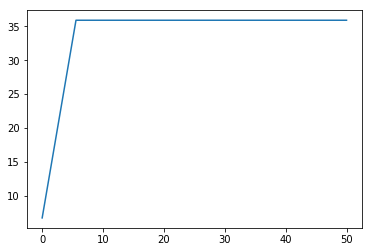

In [42]:
distdummy2 = np.zeros(10)
tnfdummy2 = np.zeros(10)
nfatdummy2 = np.zeros(10)
for i in np.arange(10):
    distdummy2[i] = dist[i][300]
    tnfdummy2[i] = tnfe[i][300]
    nfatdummy2[i] = nfat[i][300]
plt.plot(p2x7,distdummy2)

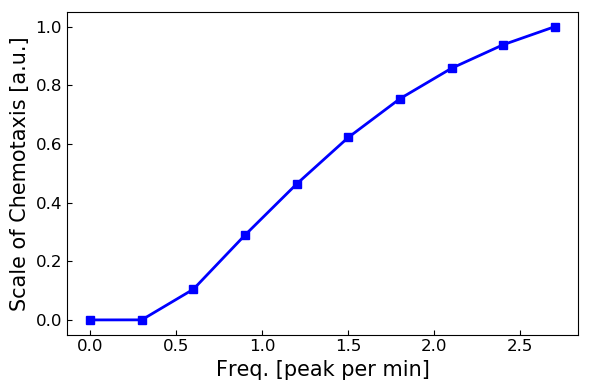

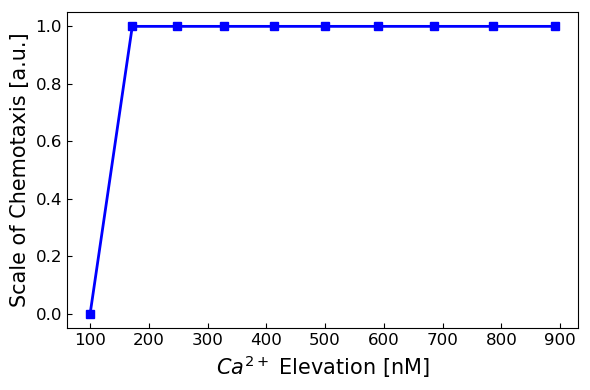

In [36]:

datadummy = distdummy-min(distdummy)
datas1 = datadummy/max(datadummy)
datadummy = distdummy2-min(distdummy2)
datas2 = datadummy/max(datadummy)
freq = scipy.linspace(0,2.7,10)
plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=12)
plt.plot(freq,datas1,'bs-',lw=2,alpha=1)
plt.xlabel('Freq. [peak per min]',fontsize=15)
plt.ylabel('Scale of Chemotaxis [a.u.]',fontsize=15)
plt.tight_layout()
plt.savefig("chemfreq.png")

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=12)
plt.plot(Catail,datas2,'bs-',lw=2,alpha=1)
plt.xlabel('$Ca^{2+}$ Elevation [nM]',fontsize=15)
plt.ylabel('Scale of Chemotaxis [a.u.]',fontsize=15)
plt.tight_layout()
plt.savefig("chemelev.png")

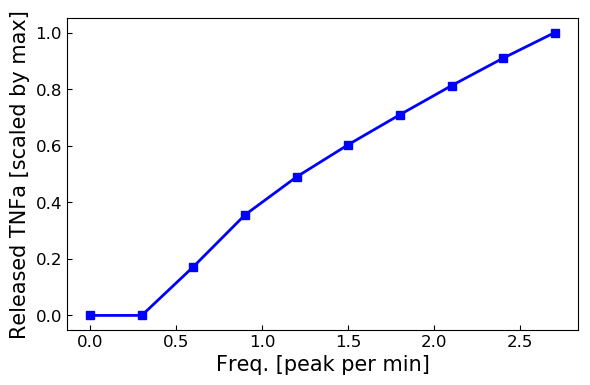

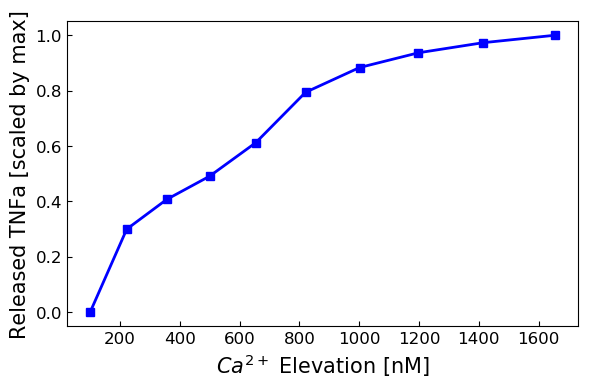

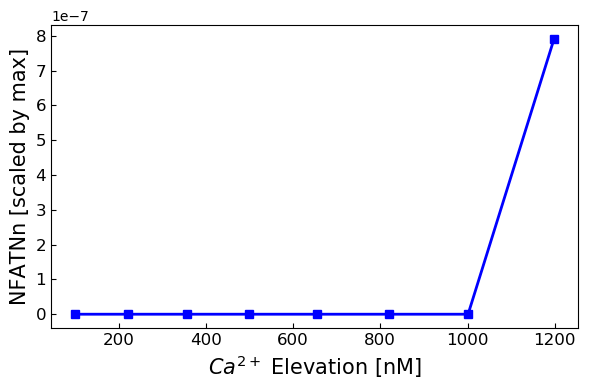

In [47]:

datadummy = tnfdummy-min(tnfdummy)
datas3 = datadummy/max(datadummy)
datadummy = tnfdummy2-min(tnfdummy2)
datas4 = datadummy/max(datadummy)
datadummy = nfatdummy2-min(nfatdummy2)
datas5 = datadummy/datadummy[-2]
freq = scipy.linspace(0,2.7,10)

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=12)
plt.plot(freq,datas3,'bs-',lw=2,alpha=1)
plt.xlabel('Freq. [peak per min]',fontsize=15)
plt.ylabel('Released TNFa [scaled by max]',fontsize=15)
plt.tight_layout()
plt.savefig("tnffreq.png")

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=12)
plt.plot(Catail,datas4,'bs-',lw=2,alpha=1)
plt.xlabel('$Ca^{2+}$ Elevation [nM]',fontsize=15)
plt.ylabel('Released TNFa [scaled by max]',fontsize=15)
plt.tight_layout()
plt.savefig("tnfelev.png")

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=12)
plt.plot(Catail[0:8],datas5[0:8],'bs-',lw=2,alpha=1)
plt.xlabel('$Ca^{2+}$ Elevation [nM]',fontsize=15)
plt.ylabel('NFATNn [scaled by max]',fontsize=15)
plt.tight_layout()
plt.savefig("nfatelev.png")

In [91]:
time = 600
counter = 0
Kp = scipy.linspace(10,2000,2)
for i in np.arange(len(Kp)): # ATP
    data   = SR.gotranMicroglia(sim_time      = time,
                                    ATP           = 200,
                                    output_name   = 'test1',
                                    ode_file_name = 'p2xp2yMigration27', # 6 works
                                    rhop2x7       = 1,
                                    DegSwitch     = 0,
                                    Kc_p2y        = Kp[i],
                                    data_name2    = 'TNFae',
                                    data_name3    = 'mRNA_TNF',
                                    data_name4    = 'S2',
                                    removePickle  = 1)
    
    if counter == 0:
            dura    = data[0]
            Ca      = data[1]
            Catail  = np.average(data[1][300:599])
            tnfe    = data[2]
            mrna    = data[3]
            dist    = data[4]
            entry   = counter
            p7      = p2x7[j]
            kp      = Kp[i]
    else:
            Ca      = np.vstack([Ca,data[1]])
            Catail  = np.append(Catail,np.average(data[1][300:599]))
            tnfe    = np.vstack([tnfe,data[2]])
            mrna    = np.vstack([mrna,data[3]])
            dist    = np.vstack([dist,data[4]])
            p7      = np.append(p7,p2x7[j])
            kp      = np.append(kp,Kp[i])
        
    counter = counter + 1 
        
import pandas as pd 

data = {
    'P2X7': p7,
    'Kp': kp,
    'Ca Tail':Catail
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 9.002607345581055 seconds --------------
 ------------ End of Simulation -----------
 -------------- 9.528329610824585 seconds --------------
 ------------ End of Simulation -----------


,P2X7,Kp,Ca Tail
0,0.89,10.0,133.910127
1,0.89,2000.0,161.195003


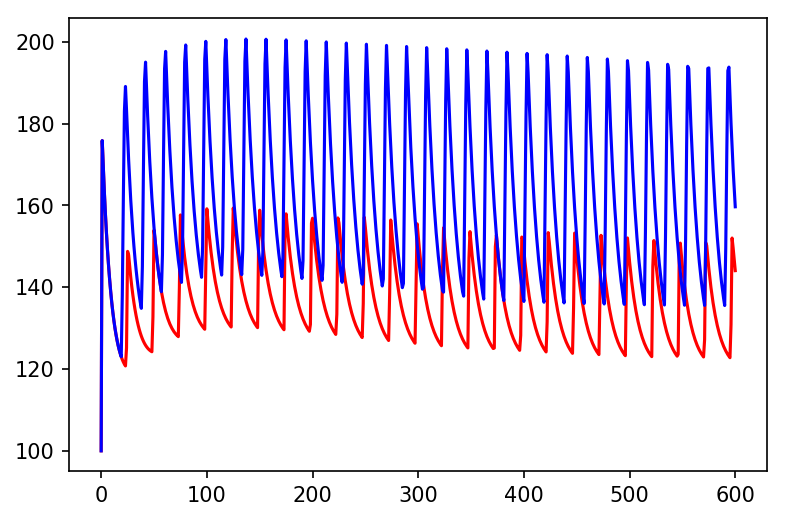

In [92]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(dura,Ca[0],'r')
plt.plot(dura,Ca[1],'b')

In [71]:
27/10

2.7

In [119]:
time = 600
counter = 0
Kp = scipy.linspace(5,20,20)
p2x7 = scipy.linspace(0.01,1,20)
for i in np.arange(len(Kp)): # ATP
    for j in np.arange(len(p2x7)):
        data   = SR.gotranMicroglia(sim_time      = time,
                                    ATP           = 200,
                                    output_name   = 'test1',
                                    ode_file_name = 'p2xp2yMigration27', # 6 works
                                    rhop2x7       = p2x7[j],
                                    DegSwitch     = 0,
                                    EleSwitch     = 1,
                                    kg_p2y        = Kp[i],
                                    data_name2    = 'TNFae',
                                    data_name3    = 'mRNA_TNF',
                                    data_name4    = 'S2',
                                    removePickle  = 1)
    
        if counter == 0:
            dura    = data[0]
            Ca      = data[1]
            Catail  = np.average(data[1][300:599])
            tnfe    = data[2]
            mrna    = data[3]
            dist    = data[4]
            entry   = counter
            p7      = p2x7[j]
            kp      = Kp[i]
        else:
            Ca      = np.vstack([Ca,data[1]])
            Catail  = np.append(Catail,np.average(data[1][300:599]))
            tnfe    = np.vstack([tnfe,data[2]])
            mrna    = np.vstack([mrna,data[3]])
            dist    = np.vstack([dist,data[4]])
            p7      = np.append(p7,p2x7[j])
            kp      = np.append(kp,Kp[i])
        
        counter = counter + 1 
        
import pandas as pd 

data = {
    'P2X7': p7,
    'Kp': kp,
    'Ca Tail':Catail
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 7.887562036514282 seconds --------------
 ------------ End of Simulation -----------
 -------------- 8.029562711715698 seconds --------------
 ------------ End of Simulation -----------
 -------------- 8.069413185119629 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.774575710296631 seconds --------------
 ------------ End of Simulation -----------
 -------------- 8.003756523132324 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.690349340438843 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.920975208282471 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.896818161010742 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.791793584823608 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.932036399841309 seconds --------------
 ------------ End of Simulation --

,P2X7,Kp,Ca Tail
0,0.010000,5.000000,100.243097
1,0.062105,5.000000,101.299367
2,0.114211,5.000000,102.358650
3,0.166316,5.000000,103.420880
4,0.218421,5.000000,104.485993
5,0.270526,5.000000,105.553926
6,0.322632,5.000000,106.624618
7,0.374737,5.000000,107.698007
8,0.426842,5.000000,108.774037
9,0.478947,5.000000,109.852648


In [139]:
minCa = min(Catail)
maxCa = max(Catail)
Calim = scipy.linspace(minCa,maxCa,30)
m = len(Calim)
w = len(Kp)
l = len(Catail)
distA = np.zeros((m,w))
tnfeA = np.zeros((m,w))
mrnaA = np.zeros((m,w))
Calist = np.zeros((m,w))
Kplist = np.zeros((m,w))
counter = 0
for i in np.arange(w): ## frequency base
    for j in np.arange(m): ## concentration base
        for k in  np.arange(l): ## data length base
            if Kp[(w-1)-i] == kp[k]:
                if j+1 == m:
                    continue
                else:
                    if Catail[k] > Calim[j] and Catail[k] < Calim[j+1]:
                        
                        distA[j,i] = dist[k][299]
                        tnfeA[j,i] = tnfe[k][299]
                        mrnaA[j,i] = mrna[k][299]
                        Kplist[j,i] = Kp[w-1-i]
                        Calist[j,i] = Catail[k]
                    
for i in np.arange(w):
    for j in np.arange(m):
        if distA[j,i] == 0:
            distA[j,i] = float('Nan')
            tnfeA[j,i] = float('Nan')
            mrnaA[j,i] = float('Nan')
            counter = counter + 1
            
print(w*m - counter)
print(distA)

346
[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan  7.26840003  7.26793647
   7.26763783  7.26740311]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan  9.47386998  9.47023179
   9.46793837  9.46622184]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan 16.39550588 16.38728614
  16.38205243 16.37811677]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan 13.02576241 25.19323823 25.18677201
  25.18257461 25.17939803]


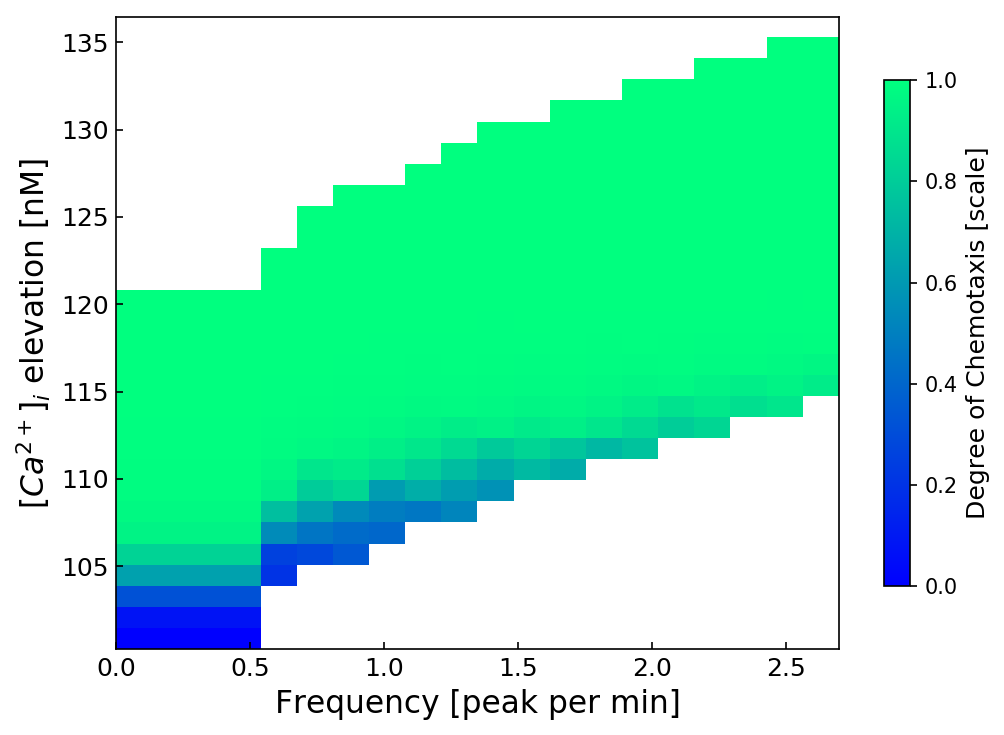

In [147]:
import matplotlib.cm as cm
plt.figure(figsize=(7,5),dpi=150)
plt.tick_params(labelsize=12,direction='in')
## Control 3 = 1/5 1 = 1/30 2 = 1/60
nan = 0 #float('NaN')

data2 = (np.array(np.flip(distA,1))-distA[0][-1])/(distA[28][1]-distA[0][-1])

data = scipy.ndimage.zoom(data2, 4)

im = plt.imshow(data2,  origin='lower',
                cmap=cm.winter, extent=(0,2.7,minCa,maxCa),aspect='auto')
#im = plt.imshow(data2, origin='lower',
#                cmap=cm.winter, extent=(1,4,minCa,maxCa),aspect='auto')

#levels = [0.5]
#CS = plt.contour(data2, levels, origin='lower',colors='yellow', 
#                linewidths=2, extent=(1,4,minCa,maxCa))

CBI = plt.colorbar(im, orientation='vertical', shrink=0.8)
CBI.set_label('Degree of Chemotaxis [scale]', fontsize=12)
#plt.clabel(CS, inline=1, fontsize=12)
#plt.xlim([0,3])
#plt.ylim([100,106])
plt.xlabel("Frequency [peak per min]",fontsize=15)
plt.ylabel("$[Ca^{2+}]_i$ elevation [nM]",fontsize=15)
plt.tight_layout()
plt.savefig('freqvselevDist.png')

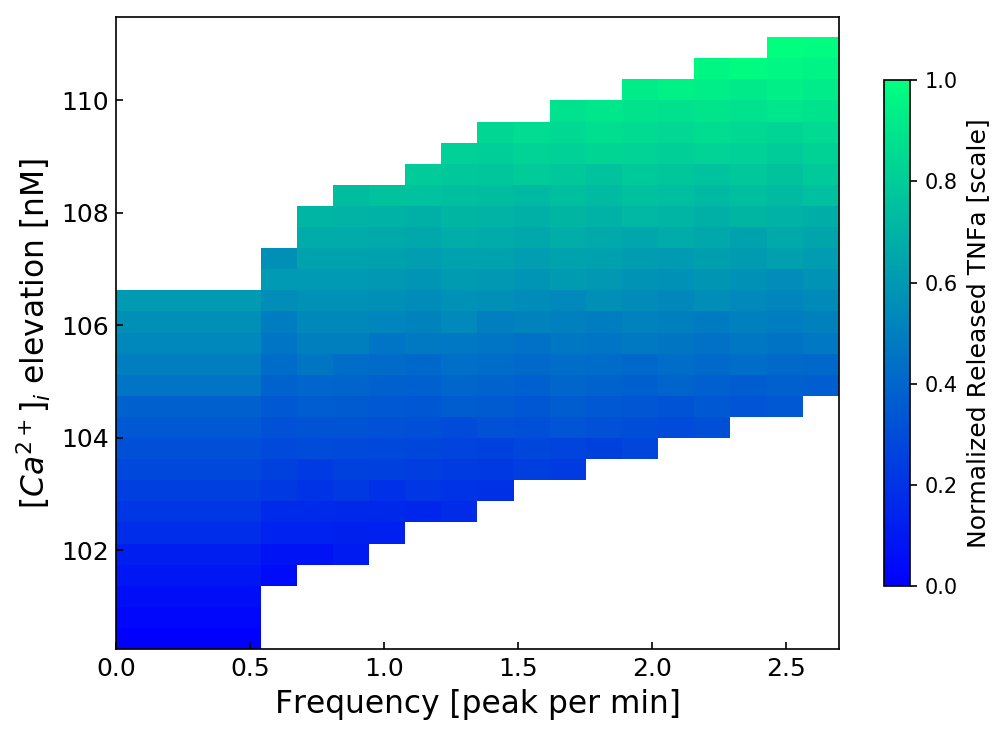

In [148]:
import matplotlib.cm as cm
plt.figure(figsize=(7,5),dpi=150)
plt.tick_params(labelsize=12,direction='in')
## Control 3 = 1/5 1 = 1/30 2 = 1/60
nan = 0 #float('NaN')

data2 = (np.array(np.flip(tnfeA,1))-tnfeA[0][-1])/(tnfeA[28][1]-tnfeA[0][-1])

#data = scipy.ndimage.zoom(data2, 4)

im = plt.imshow(data2,  origin='lower',
                cmap=cm.winter, extent=(0,2.7,minCa,Calim[9]),aspect='auto')
#im = plt.imshow(data2, origin='lower',
#                cmap=cm.winter, extent=(1,4,minCa,maxCa),aspect='auto')

#levels = [0.5]
#CS = plt.contour(data2, levels, origin='lower',colors='yellow', 
#                linewidths=2, extent=(1,4,minCa,maxCa))

CBI = plt.colorbar(im, orientation='vertical', shrink=0.8)
CBI.set_label('Normalized Released TNFa [scale]', fontsize=12)
#plt.clabel(CS, inline=1, fontsize=12)
#plt.xlim([0,3])
plt.xlabel("Frequency [peak per min]",fontsize=15)
plt.ylabel("$[Ca^{2+}]_i$ elevation [nM]",fontsize=15)
plt.tight_layout()
plt.savefig('freqvselevTNFaReleased.png')

In [110]:
minCa = min(Catail)
maxCa = max(Catail)
Calim = scipy.linspace(minCa,maxCa,30)
m = len(Calim)
w = len(Kp)
l = len(Catail)
distA = np.zeros((m,w))
tnfeA = np.zeros((m,w))
mrnaA = np.zeros((m,w))
Calist = np.zeros((m,w))
Kplist = np.zeros((m,w))
counter = 0
for i in np.arange(w): ## frequency base
    for j in np.arange(m): ## concentration base
        for k in  np.arange(l): ## data length base
            if Kp[(w-1)-i] == kp[k]:
                if j+1 == m:
                    continue
                else:
                    if Catail[k] > Calim[j] and Catail[k] < Calim[j+1]:
                        
                        distA[j,i] = dist[k][299]
                        tnfeA[j,i] = tnfe[k][299]
                        mrnaA[j,i] = mrna[k][299]
                        Kplist[j,i] = Kp[w-1-i]
                        Calist[j,i] = Catail[k]
                    
for i in np.arange(w):
    for j in np.arange(m):
        if distA[j,i] == 0:
            distA[j,i] = float('Nan')
            tnfeA[j,i] = float('Nan')
            mrnaA[j,i] = float('Nan')
            counter = counter + 1
            
print(w*m - counter)
print(distA)
#print(maxCa)
#print(np.shape(distA))
#print(Calist)
#print(Kplist)

90
[[ 6.8821323  12.11736246 13.90779569 16.20759757 18.8480603          nan
          nan         nan         nan         nan]
 [ 7.18987298 12.83431855 15.66117473 17.15928979 19.97193504 22.06246209
          nan         nan         nan         nan]
 [ 7.81788775 13.86918999 16.96828389 18.32560678 21.32566972 23.36100554
  26.15210197         nan         nan         nan]
 [ 9.2426408  15.50271572 18.80626933 21.78822329 22.99038094 24.87438263
  27.54630548         nan         nan         nan]
 [12.02593785 17.9915282  21.27971595 24.18811076 24.99099866 26.60967378
  29.04857398         nan         nan         nan]
 [16.23789293 21.26434999 24.20284365 26.77262205 27.20286798 28.4792746
  30.56093806 31.04121096         nan         nan]
 [21.05977088 24.78304515 27.11087104 29.15174814 29.34663021 31.82118957
  31.93128511 32.18978421         nan         nan]
 [25.39485437 27.90129892 29.57351218 31.06012566 31.15043699 32.98371117
  33.03516311 33.17248838         nan         nan

In [172]:
data1   = SR.gotranMicroglia(sim_time      = time,
                            ATP           = 200,
                            output_name   = 'test1',
                            ode_file_name = 'p2xp2yMigration26', # 6 works
                            rhop2x4       = 1,
                            rhop2x7       = 0.01,
                            rhop2yc       = 1,
                            DegSwitch     = 0,
                            hg_p2y        = 1,
                            removePickle  = 1)

data2   = SR.gotranMicroglia(sim_time      = time,
                            ATP           = 200,
                            output_name   = 'test1',
                            ode_file_name = 'p2xp2yMigration26', # 6 works
                            rhop2x4       = 1,
                            rhop2x7       = 1,
                            rhop2yc       = 1,
                            DegSwitch     = 0,
                            hg_p2y        = 4,
                            removePickle  = 1)

 -------------- 10.225757122039795 seconds --------------
 ------------ End of Simulation -----------
 -------------- 8.633103847503662 seconds --------------
 ------------ End of Simulation -----------


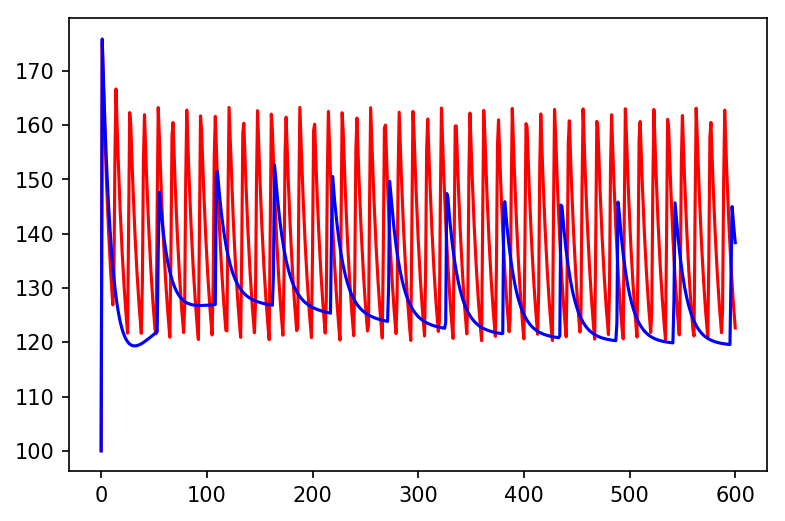

In [176]:
p1 = Periodogram(data1[1])#[440:500])
p2 = Periodogram(data2[1])#[440:500])
p1.run()
p2.run()

plt.subplots(1,1, figsize=(6,4), dpi=150)
#plt.title('A',fontsize=12,fontweight='bold',loc='left')
#plt.tick_params(labelsize=12,direction='in')
#plt.grid(color='k')

#plt.tick_params(labelsize=12)
#plt.grid(color='k',which='both',axis='x')
#p1.plot(color='r',alpha=1,label='Kp = 4')

#plt.tick_params(labelsize=12)
#plt.grid(color='k',which='both',axis='x')
#p2.plot(color='g',alpha=0.7,label='Kp = 1')
#plt.ylabel('Power (dB)',fontsize=12)
#plt.xlabel('Frequency (Hz)',fontsize=12)
#plt.legend(loc=0)
#plt.subplot(1,2, figsize=(6,4), dpi=150)
plt.plot(data1[0],data1[1],'r')
plt.plot(data2[0],data2[1],'b')
#print(np.average(data2[1]))

In [175]:
print(p2.psd[44])
print(p2.frequencies()[44])

152.31856496051824
0.07321131447587355


In [305]:
print(p1.psd[36])
print(p1.frequencies()[36])

7184.1162754873685
0.059900166389351084


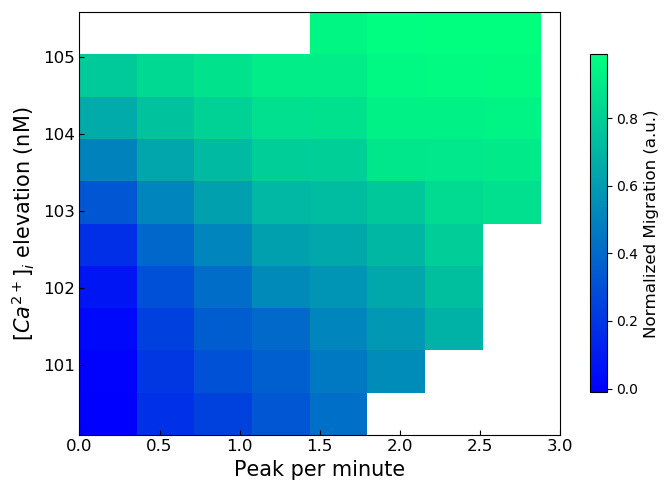

In [77]:
import matplotlib.cm as cm
plt.figure(figsize=(7,5),dpi=100)
plt.tick_params(labelsize=12,direction='in')
## Control 3 = 1/5 1 = 1/30 2 = 1/60
nan = 0 #float('NaN')

data2 = (np.array([distA[0],distA[1],distA[2],distA[3],distA[4],
                  distA[5],distA[6],distA[7],distA[8],distA[9],
                  #distA[10],distA[11],distA[12],distA[13],distA[14],
                  #distA[15],distA[16],distA[17],distA[18],distA[19],
                  #distA[20],distA[21],distA[22],distA[23],distA[24],
                  #distA[25],distA[26]#,distA[27]#,distA[28]#,distA[29]
                  ])-distA[1][0])/(distA[9][-3]-distA[0][0])

data = scipy.ndimage.zoom(data2, 4)

im = plt.imshow(data2,  origin='lower',
                cmap=cm.winter, extent=(0.0,3.6,minCa,Calim[9]),aspect='auto')
#im = plt.imshow(data2, origin='lower',
#                cmap=cm.winter, extent=(1,4,minCa,maxCa),aspect='auto')

#levels = [0.5]
#CS = plt.contour(data2, levels, origin='lower',colors='yellow', 
#                linewidths=2, extent=(1,4,minCa,maxCa))

CBI = plt.colorbar(im, orientation='vertical', shrink=0.8)
CBI.set_label('Normalized Migration (a.u.)', fontsize=12)
#plt.clabel(CS, inline=1, fontsize=12)
plt.xlim([0,3])
#plt.ylim([100,106])
plt.xlabel("Peak per minute",fontsize=15)
plt.ylabel("$[Ca^{2+}]_i$ elevation (nM)",fontsize=15)
plt.tight_layout()
plt.savefig('freqvselevDist.png')

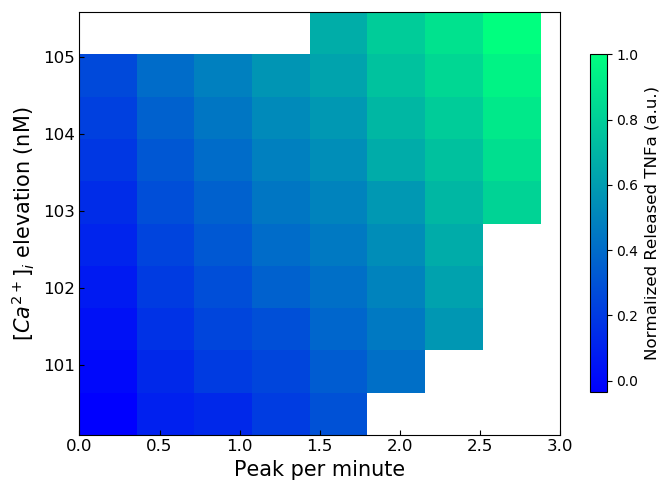

In [78]:
import matplotlib.cm as cm
plt.figure(figsize=(7,5),dpi=100)
plt.tick_params(labelsize=12,direction='in')
## Control 3 = 1/5 1 = 1/30 2 = 1/60
nan = 0 #float('NaN')

data2 = (np.array([tnfeA[0],tnfeA[1],tnfeA[2],tnfeA[3],tnfeA[4],
                  tnfeA[5],tnfeA[6],tnfeA[7],tnfeA[8],tnfeA[9],
                  #tnfeA[10],tnfeA[11],tnfeA[12],tnfeA[13],tnfeA[14],
                  #tnfeA[15],tnfeA[16],tnfeA[17],tnfeA[18],tnfeA[19],
                  #tnfeA[20],tnfeA[21],tnfeA[22],tnfeA[23],tnfeA[24],
                  #tnfeA[25],tnfeA[26],tnfeA[27],tnfeA[28],tnfeA[29],
                  ])-tnfeA[1][0])/(tnfeA[9][-3]-tnfeA[1][0])

#data = scipy.ndimage.zoom(data2, 4)

im = plt.imshow(data2,  origin='lower',
                cmap=cm.winter, extent=(0.0,3.6,minCa,Calim[9]),aspect='auto')
#im = plt.imshow(data2, origin='lower',
#                cmap=cm.winter, extent=(1,4,minCa,maxCa),aspect='auto')

#levels = [0.5]
#CS = plt.contour(data2, levels, origin='lower',colors='yellow', 
#                linewidths=2, extent=(1,4,minCa,maxCa))

CBI = plt.colorbar(im, orientation='vertical', shrink=0.8)
CBI.set_label('Normalized Released TNFa (a.u.)', fontsize=12)
#plt.clabel(CS, inline=1, fontsize=12)
plt.xlim([0,3])
plt.xlabel("Peak per minute",fontsize=15)
plt.ylabel("$[Ca^{2+}]_i$ elevation (nM)",fontsize=15)
plt.tight_layout()
plt.savefig('freqvselevTNFaReleased.png')